## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  80.471665  1107.649629  0.060833  8.933414  0.797321
1  63.710826   759.866082  0.674357  7.781673  1.322212
2  73.870877   263.913187  0.672502  8.300103  1.256584
3  23.255347   562.831806  0.365596  1.686972  1.604289
4  24.667999   887.252616  0.805478  3.980861  1.397776


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 0.9383954	total: 100ms	remaining: 1m 40s
1:	learn: 0.9300935	total: 109ms	remaining: 54.2s
2:	learn: 0.9207205	total: 109ms	remaining: 36.4s
3:	learn: 0.9124208	total: 110ms	remaining: 27.4s
4:	learn: 0.9024264	total: 112ms	remaining: 22.2s
5:	learn: 0.8949162	total: 113ms	remaining: 18.7s
6:	learn: 0.8869995	total: 114ms	remaining: 16.1s
7:	learn: 0.8773836	total: 114ms	remaining: 14.2s
8:	learn: 0.8693760	total: 115ms	remaining: 12.7s
9:	learn: 0.8606735	total: 116ms	remaining: 11.5s
10:	learn: 0.8532655	total: 116ms	remaining: 10.5s
11:	learn: 0.8464329	total: 118ms	remaining: 9.72s
12:	learn: 0.8395214	total: 119ms	remaining: 9.04s
13:	learn: 0.8301954	total: 120ms	remaining: 8.46s
14:	learn: 0.8220196	total: 121ms	remaining: 7.93s
15:	learn: 0.8124845	total: 122ms	remaining: 7.48s
16:	learn: 0.8042769	total: 122ms	remaining: 7.08s
17:	learn: 0.7981272	total: 123ms	remaining: 6.72s
18:	learn: 0.7907290	total: 124ms	remaining: 6.4s
19:	learn: 0.7823231	total: 125ms	remaini

72:	learn: 0.4984688	total: 171ms	remaining: 2.17s
73:	learn: 0.4934833	total: 171ms	remaining: 2.15s
74:	learn: 0.4894685	total: 172ms	remaining: 2.13s
75:	learn: 0.4859982	total: 173ms	remaining: 2.1s
76:	learn: 0.4824822	total: 174ms	remaining: 2.08s
77:	learn: 0.4792112	total: 175ms	remaining: 2.06s
78:	learn: 0.4757168	total: 175ms	remaining: 2.04s
79:	learn: 0.4720073	total: 176ms	remaining: 2.02s
80:	learn: 0.4681491	total: 177ms	remaining: 2.01s
81:	learn: 0.4648493	total: 178ms	remaining: 1.99s
82:	learn: 0.4617859	total: 179ms	remaining: 1.97s
83:	learn: 0.4587517	total: 179ms	remaining: 1.95s
84:	learn: 0.4552254	total: 180ms	remaining: 1.94s
85:	learn: 0.4522993	total: 180ms	remaining: 1.92s
86:	learn: 0.4493345	total: 181ms	remaining: 1.9s
87:	learn: 0.4458587	total: 181ms	remaining: 1.88s
88:	learn: 0.4415561	total: 182ms	remaining: 1.86s
89:	learn: 0.4382394	total: 183ms	remaining: 1.84s
90:	learn: 0.4339943	total: 183ms	remaining: 1.83s
91:	learn: 0.4303052	total: 184ms

228:	learn: 0.1920959	total: 255ms	remaining: 857ms
229:	learn: 0.1912989	total: 255ms	remaining: 853ms
230:	learn: 0.1904215	total: 255ms	remaining: 850ms
231:	learn: 0.1896161	total: 256ms	remaining: 847ms
232:	learn: 0.1890250	total: 256ms	remaining: 844ms
233:	learn: 0.1884628	total: 257ms	remaining: 841ms
234:	learn: 0.1878704	total: 257ms	remaining: 837ms
235:	learn: 0.1872101	total: 258ms	remaining: 834ms
236:	learn: 0.1866514	total: 258ms	remaining: 831ms
237:	learn: 0.1861027	total: 261ms	remaining: 836ms
238:	learn: 0.1853552	total: 261ms	remaining: 832ms
239:	learn: 0.1843474	total: 263ms	remaining: 832ms
240:	learn: 0.1838158	total: 266ms	remaining: 837ms
241:	learn: 0.1832541	total: 266ms	remaining: 834ms
242:	learn: 0.1822837	total: 267ms	remaining: 832ms
243:	learn: 0.1814524	total: 267ms	remaining: 829ms
244:	learn: 0.1807318	total: 268ms	remaining: 825ms
245:	learn: 0.1798784	total: 268ms	remaining: 822ms
246:	learn: 0.1792714	total: 269ms	remaining: 819ms
247:	learn: 

319:	learn: 0.1334744	total: 325ms	remaining: 690ms
320:	learn: 0.1332354	total: 325ms	remaining: 688ms
321:	learn: 0.1325725	total: 326ms	remaining: 686ms
322:	learn: 0.1323398	total: 326ms	remaining: 683ms
323:	learn: 0.1320317	total: 327ms	remaining: 682ms
324:	learn: 0.1318043	total: 327ms	remaining: 680ms
325:	learn: 0.1315807	total: 328ms	remaining: 679ms
326:	learn: 0.1313608	total: 329ms	remaining: 677ms
327:	learn: 0.1311446	total: 329ms	remaining: 675ms
328:	learn: 0.1305008	total: 330ms	remaining: 673ms
329:	learn: 0.1302904	total: 330ms	remaining: 671ms
330:	learn: 0.1296959	total: 331ms	remaining: 669ms
331:	learn: 0.1294906	total: 331ms	remaining: 667ms
332:	learn: 0.1289252	total: 332ms	remaining: 665ms
333:	learn: 0.1287248	total: 333ms	remaining: 664ms
334:	learn: 0.1285278	total: 334ms	remaining: 663ms
335:	learn: 0.1283340	total: 335ms	remaining: 662ms
336:	learn: 0.1281440	total: 335ms	remaining: 660ms
337:	learn: 0.1275904	total: 336ms	remaining: 658ms
338:	learn: 

507:	learn: 0.0917796	total: 407ms	remaining: 394ms
508:	learn: 0.0917084	total: 407ms	remaining: 393ms
509:	learn: 0.0915333	total: 407ms	remaining: 391ms
510:	learn: 0.0914941	total: 410ms	remaining: 392ms
511:	learn: 0.0914457	total: 410ms	remaining: 391ms
512:	learn: 0.0912207	total: 411ms	remaining: 390ms
513:	learn: 0.0909503	total: 411ms	remaining: 389ms
514:	learn: 0.0908807	total: 411ms	remaining: 387ms
515:	learn: 0.0908124	total: 412ms	remaining: 386ms
516:	learn: 0.0903288	total: 412ms	remaining: 385ms
517:	learn: 0.0902622	total: 412ms	remaining: 384ms
518:	learn: 0.0902155	total: 413ms	remaining: 383ms
519:	learn: 0.0897470	total: 413ms	remaining: 381ms
520:	learn: 0.0896665	total: 414ms	remaining: 380ms
521:	learn: 0.0896305	total: 414ms	remaining: 379ms
522:	learn: 0.0894548	total: 414ms	remaining: 378ms
523:	learn: 0.0893916	total: 415ms	remaining: 377ms
524:	learn: 0.0893295	total: 415ms	remaining: 376ms
525:	learn: 0.0890151	total: 415ms	remaining: 374ms
526:	learn: 

655:	learn: 0.0666791	total: 483ms	remaining: 253ms
656:	learn: 0.0666554	total: 484ms	remaining: 253ms
657:	learn: 0.0664714	total: 484ms	remaining: 252ms
658:	learn: 0.0664084	total: 485ms	remaining: 251ms
659:	learn: 0.0661986	total: 485ms	remaining: 250ms
660:	learn: 0.0657769	total: 486ms	remaining: 249ms
661:	learn: 0.0657249	total: 487ms	remaining: 248ms
662:	learn: 0.0656182	total: 487ms	remaining: 248ms
663:	learn: 0.0655953	total: 487ms	remaining: 247ms
664:	learn: 0.0654535	total: 488ms	remaining: 246ms
665:	learn: 0.0652501	total: 489ms	remaining: 245ms
666:	learn: 0.0651448	total: 489ms	remaining: 244ms
667:	learn: 0.0651224	total: 490ms	remaining: 243ms
668:	learn: 0.0651004	total: 490ms	remaining: 242ms
669:	learn: 0.0649005	total: 490ms	remaining: 242ms
670:	learn: 0.0647630	total: 491ms	remaining: 241ms
671:	learn: 0.0646588	total: 491ms	remaining: 240ms
672:	learn: 0.0646374	total: 492ms	remaining: 239ms
673:	learn: 0.0645772	total: 492ms	remaining: 238ms
674:	learn: 

849:	learn: 0.0425365	total: 563ms	remaining: 99.4ms
850:	learn: 0.0424250	total: 564ms	remaining: 98.7ms
851:	learn: 0.0423784	total: 564ms	remaining: 98ms
852:	learn: 0.0423199	total: 565ms	remaining: 97.3ms
853:	learn: 0.0422111	total: 565ms	remaining: 96.6ms
854:	learn: 0.0420725	total: 566ms	remaining: 96ms
855:	learn: 0.0419767	total: 566ms	remaining: 95.3ms
856:	learn: 0.0417938	total: 567ms	remaining: 94.6ms
857:	learn: 0.0417555	total: 567ms	remaining: 93.9ms
858:	learn: 0.0416583	total: 568ms	remaining: 93.2ms
859:	learn: 0.0416162	total: 568ms	remaining: 92.5ms
860:	learn: 0.0414814	total: 568ms	remaining: 91.7ms
861:	learn: 0.0414377	total: 569ms	remaining: 91ms
862:	learn: 0.0412603	total: 569ms	remaining: 90.3ms
863:	learn: 0.0412159	total: 569ms	remaining: 89.6ms
864:	learn: 0.0411725	total: 570ms	remaining: 88.9ms
865:	learn: 0.0410771	total: 570ms	remaining: 88.2ms
866:	learn: 0.0410527	total: 571ms	remaining: 87.6ms
867:	learn: 0.0409165	total: 571ms	remaining: 86.9ms

914:	learn: 0.0373966	total: 627ms	remaining: 58.2ms
915:	learn: 0.0373768	total: 627ms	remaining: 57.5ms
916:	learn: 0.0372629	total: 628ms	remaining: 56.8ms
917:	learn: 0.0372435	total: 629ms	remaining: 56.2ms
918:	learn: 0.0370936	total: 630ms	remaining: 55.5ms
919:	learn: 0.0370591	total: 630ms	remaining: 54.8ms
920:	learn: 0.0370228	total: 631ms	remaining: 54.1ms
921:	learn: 0.0370038	total: 632ms	remaining: 53.5ms
922:	learn: 0.0368867	total: 632ms	remaining: 52.8ms
923:	learn: 0.0367397	total: 633ms	remaining: 52.1ms
924:	learn: 0.0366656	total: 634ms	remaining: 51.4ms
925:	learn: 0.0366468	total: 634ms	remaining: 50.7ms
926:	learn: 0.0366118	total: 635ms	remaining: 50ms
927:	learn: 0.0364211	total: 635ms	remaining: 49.3ms
928:	learn: 0.0363072	total: 636ms	remaining: 48.6ms
929:	learn: 0.0361641	total: 636ms	remaining: 47.9ms
930:	learn: 0.0360964	total: 637ms	remaining: 47.2ms
931:	learn: 0.0360791	total: 638ms	remaining: 46.6ms
932:	learn: 0.0359675	total: 639ms	remaining: 45

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4336579132084985


ABC Pre-generator MAE 1.1833921277090824


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

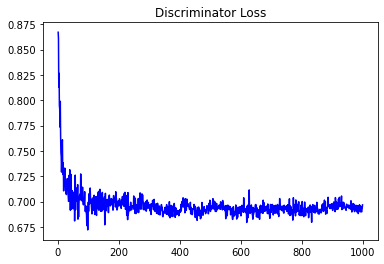

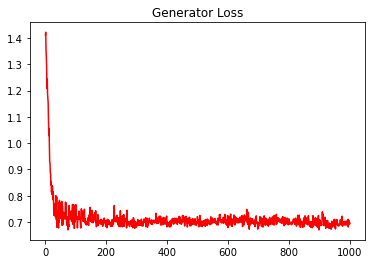

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.7364817515481263


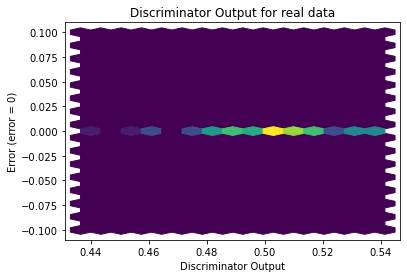

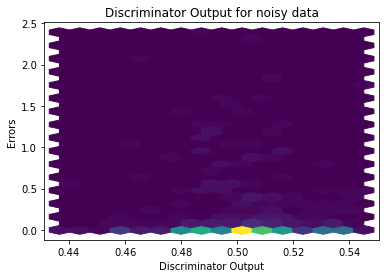

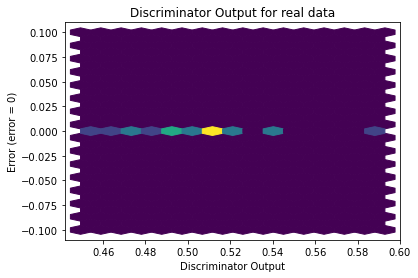

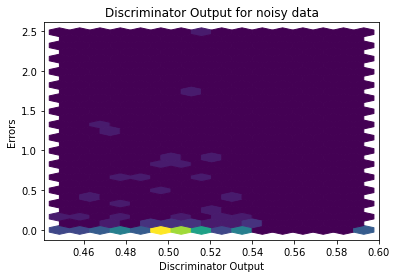

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

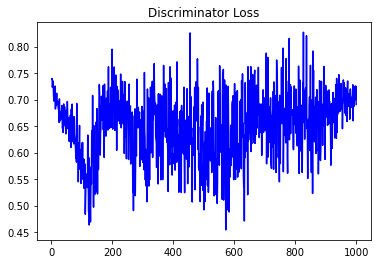

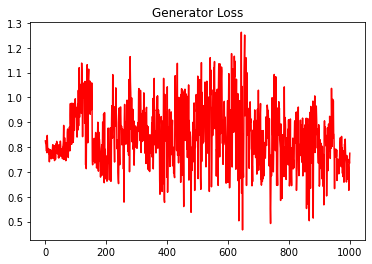

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.9056565552484244


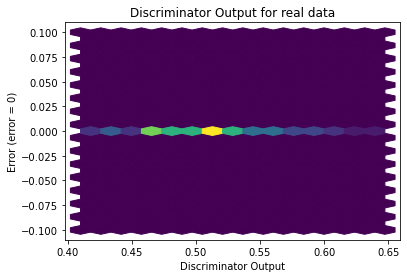

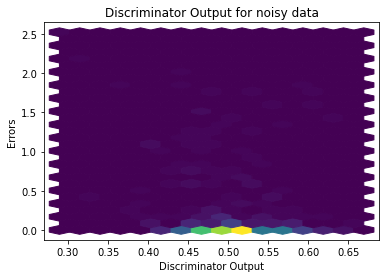

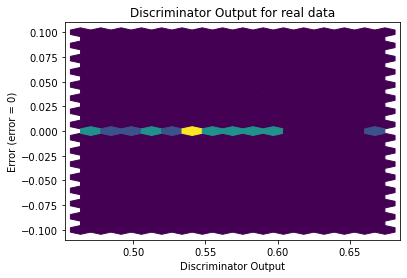

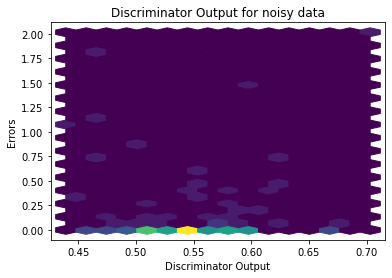

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


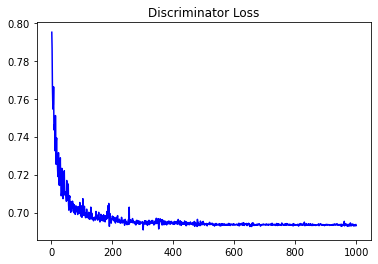

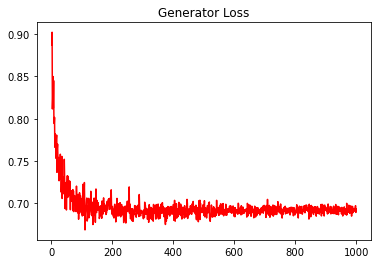

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
1.2399190753232687


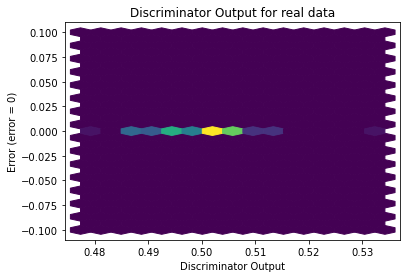

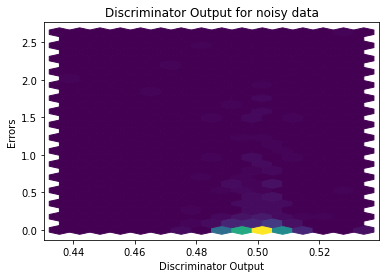

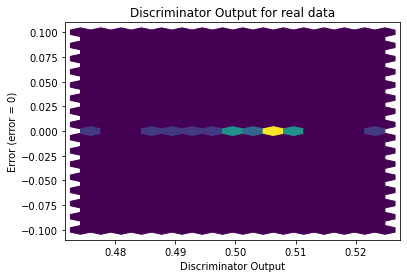

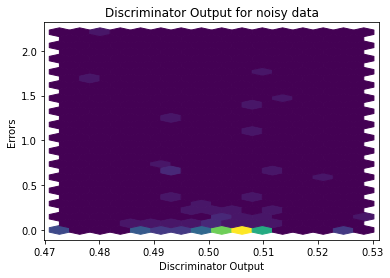

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


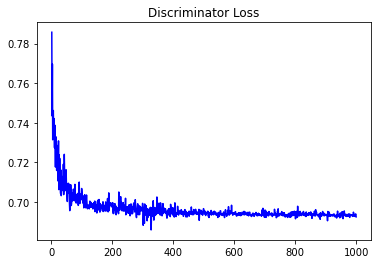

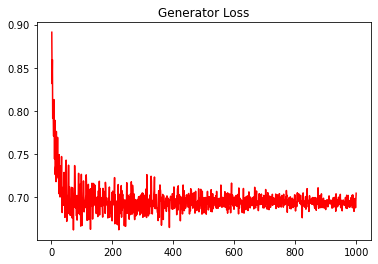

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
1.1181887961458414


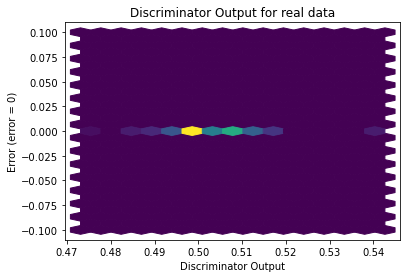

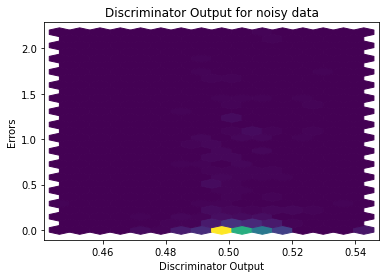

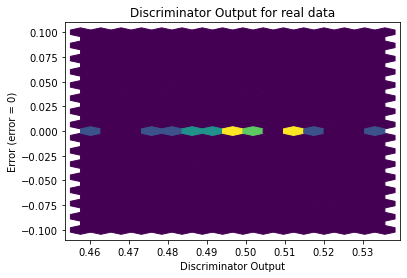

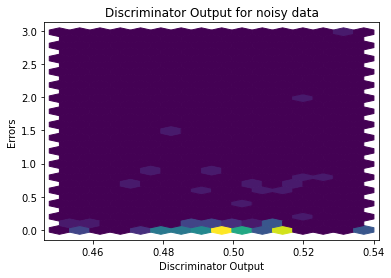

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0728]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0446]], requires_grad=True)
